# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch


### Necessary Imports

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [2]:
import os
from google.colab import drive

### Download The Dataset & Define The Transforms

In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()  # images [64, 1, 28, 28]，64 张，1 通道，28 宽，28 高 的图片  # labels [64] 64个标签
  # 28*28 = 784 个像素点，每张图片作为输入是[768] 的一维数组，每一批总共输入64 张，既是：[64, 784]
  # so, 输入层共784 个神经元结点，每个结点得到图片的其中一个像素作为输入
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
images[0].numpy().squeeze()

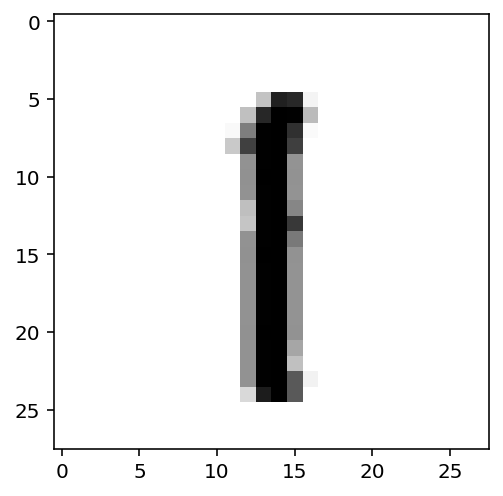

In [10]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');  # squeeze 将 [1, 28, 28] 降维成 [28, 28]

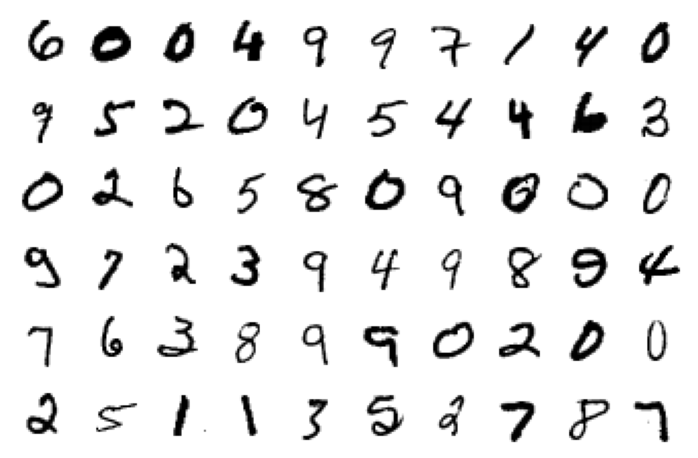

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)  # 绘制  6 行，10 列 个对象
    plt.axis('off')            # 关闭坐标轴显示
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [12]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [19]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)  # 元素的总数不变，对维度重新进行解释，相当于 reshape  # 64 行，列数自适应(-1 的作用)  
  # 28*28 = 784 个像素点，每张图片作为输入是[784] 的一维数组，每一批总共输入64 张，既是：[64, 784]

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [20]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029]],
       device='cuda:0')


In [21]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [24]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0012, -0.0225,  0.0267,  ...,  0.0227, -0.0103,  0.0172],
        [ 0.0122, -0.0176, -0.0277,  ...,  0.0259,  0.0180,  0.0141],
        [ 0.0327, -0.0125, -0.0242,  ...,  0.0116, -0.0082,  0.0349],
        ...,
        [ 0.0252,  0.0058,  0.0045,  ..., -0.0081,  0.0170,  0.0050],
        [-0.0033,  0.0250,  0.0175,  ..., -0.0157,  0.0305,  0.0201],
        [-0.0152,  0.0119, -0.0002,  ...,  0.0078,  0.0345,  0.0043]],
       device='cuda:0', requires_grad=True)
Gradient - tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        ...,
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045]],
       device='cuda:0')


In [25]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0012, -0.0225,  0.0266,  ...,  0.0227, -0.0104,  0.0172],
        [ 0.0122, -0.0176, -0.0277,  ...,  0.0259,  0.0180,  0.0141],
        [ 0.0326, -0.0125, -0.0242,  ...,  0.0116, -0.0082,  0.0348],
        ...,
        [ 0.0253,  0.0059,  0.0045,  ..., -0.0081,  0.0171,  0.0050],
        [-0.0033,  0.0250,  0.0175,  ..., -0.0157,  0.0305,  0.0201],
        [-0.0152,  0.0120, -0.0002,  ...,  0.0078,  0.0346,  0.0044]],
       device='cuda:0', requires_grad=True)


### Core Training Of Neural Network

In [26]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6275555730533244
Epoch 1 - Training loss: 0.2827435612186059
Epoch 2 - Training loss: 0.21991522895740168
Epoch 3 - Training loss: 0.17586639725259626
Epoch 4 - Training loss: 0.14715168591556962
Epoch 5 - Training loss: 0.12586517522889953
Epoch 6 - Training loss: 0.11110688849533004
Epoch 7 - Training loss: 0.09940007784123868
Epoch 8 - Training loss: 0.08842854701907936
Epoch 9 - Training loss: 0.0804167926561699
Epoch 10 - Training loss: 0.07254932832761185
Epoch 11 - Training loss: 0.06691793753141995
Epoch 12 - Training loss: 0.0620675794653662
Epoch 13 - Training loss: 0.057212996964049
Epoch 14 - Training loss: 0.05091275755134322

Training Time (in minutes) = 1.8884306391080221


In [27]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 6


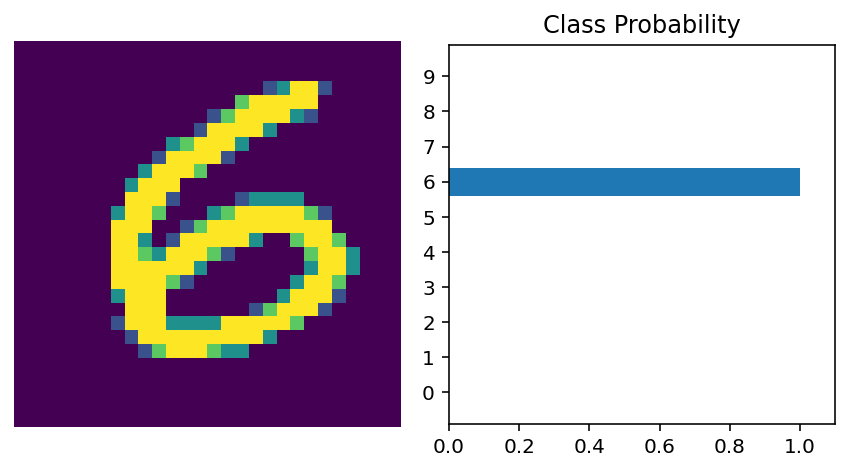

In [39]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [40]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9755
